In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

In [2]:
data = [
    446.6565,
    454.4733,
    455.663,
    423.6322,
    456.2713,
    440.5881,
    425.3325,
    485.1494,
    506.0482,
    526.792,
    514.2689,
    494.211,
]
index = pd.date_range(start="1996", end="2008", freq="A")
oildata = pd.Series(data, index)

data = [
    17.5534,
    21.86,
    23.8866,
    26.9293,
    26.8885,
    28.8314,
    30.0751,
    30.9535,
    30.1857,
    31.5797,
    32.5776,
    33.4774,
    39.0216,
    41.3864,
    41.5966,
]
index = pd.date_range(start="1990", end="2005", freq="A")
air = pd.Series(data, index)

data = [
    263.9177,
    268.3072,
    260.6626,
    266.6394,
    277.5158,
    283.834,
    290.309,
    292.4742,
    300.8307,
    309.2867,
    318.3311,
    329.3724,
    338.884,
    339.2441,
    328.6006,
    314.2554,
    314.4597,
    321.4138,
    329.7893,
    346.3852,
    352.2979,
    348.3705,
    417.5629,
    417.1236,
    417.7495,
    412.2339,
    411.9468,
    394.6971,
    401.4993,
    408.2705,
    414.2428,
]
index = pd.date_range(start="1970", end="2001", freq="A")
livestock2 = pd.Series(data, index)

data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock3 = pd.Series(data, index)

data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
index = pd.date_range(start="2005", end="2010-Q4", freq="QS-OCT")
aust = pd.Series(data, index)

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


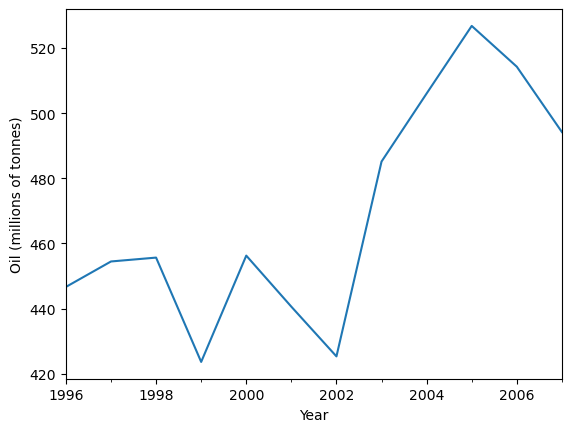

In [3]:
ax = oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

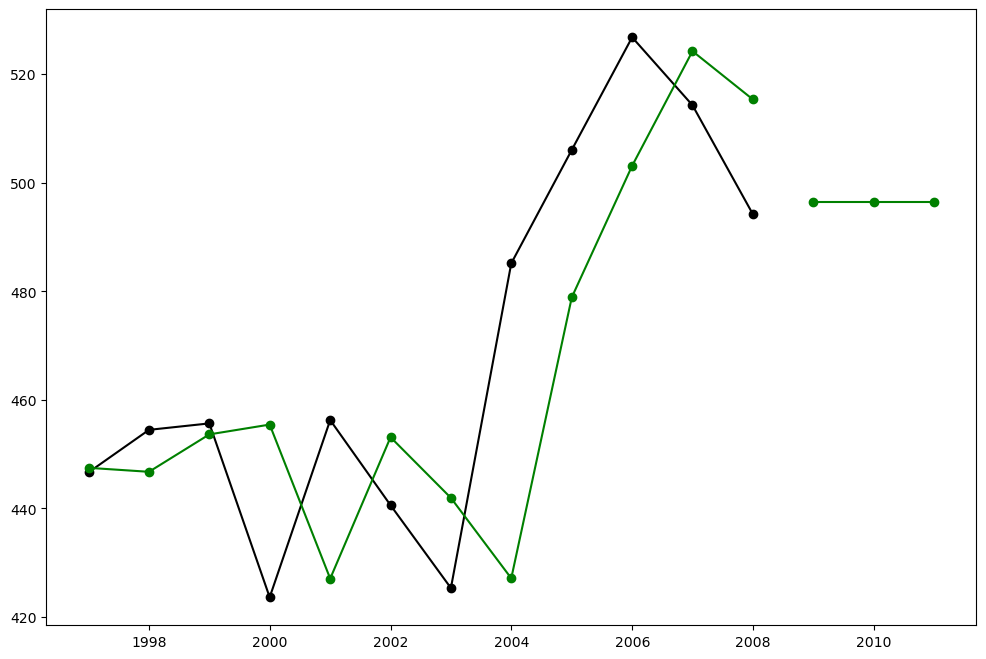

In [8]:
fit1 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(oildata, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(oildata, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker="o", color="black")
# plt.plot(fit1.fittedvalues, marker="o", color="blue")
# (line1,) = plt.plot(fcast1, marker="o", color="blue")
# plt.plot(fit2.fittedvalues, marker="o", color="red")
# (line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

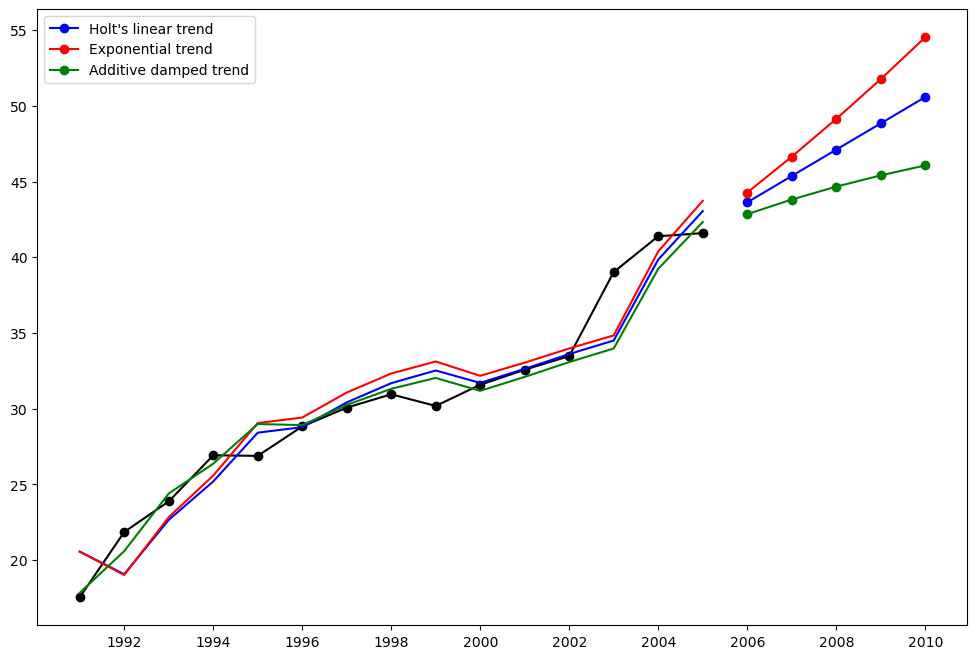

In [15]:
fit1 = Holt(air, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [16]:
fit1 = SimpleExpSmoothing(livestock2, initialization_method="estimated").fit()
fit2 = Holt(livestock2, initialization_method="estimated").fit()
fit3 = Holt(livestock2, exponential=True, initialization_method="estimated").fit()
fit4 = Holt(livestock2, damped_trend=True, initialization_method="estimated").fit(
    damping_trend=0.98
)
fit5 = Holt(
    livestock2, exponential=True, damped_trend=True, initialization_method="estimated"
).fit()
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "initial_level",
    "initial_trend",
]
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE"],
    columns=["SES", "Holt's", "Exponential", "Additive", "Multiplicative"],
)
results["SES"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

SES       Holt's   Exponential     Additive  Multiplicative
$\alpha$     1.000000     0.974304  9.776282e-01     0.978843        0.974797
$\beta$           NaN     0.000000  7.839458e-11     0.000013        0.000000
$\phi$            NaN          NaN           NaN     0.980000        0.981539
$l_0$      263.917662   258.882325  2.603412e+02   257.357173      258.926458
$b_0$             NaN     5.010796  1.013780e+00     6.644877        1.038292
SSE       6761.350235  6004.138200  6.104195e+03  6036.625083     6081.996216

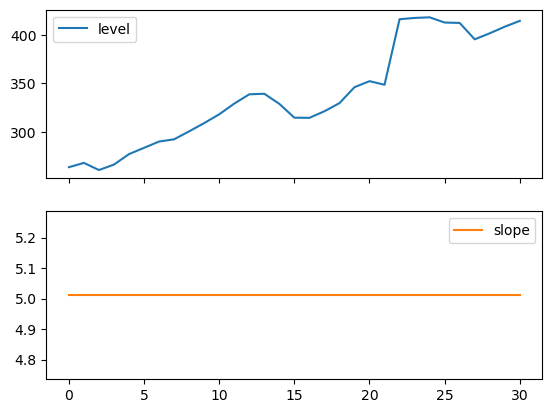

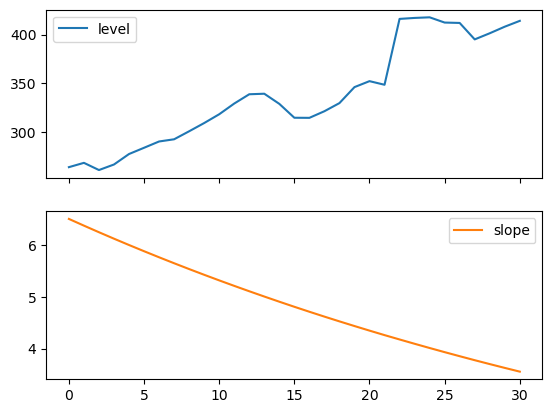

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [17]:
for fit in [fit2, fit4]:
    pd.DataFrame(np.c_[fit.level, fit.trend]).rename(
        columns={0: "level", 1: "slope"}
    ).plot(subplots=True)
plt.show()
print(
    "Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method."
)

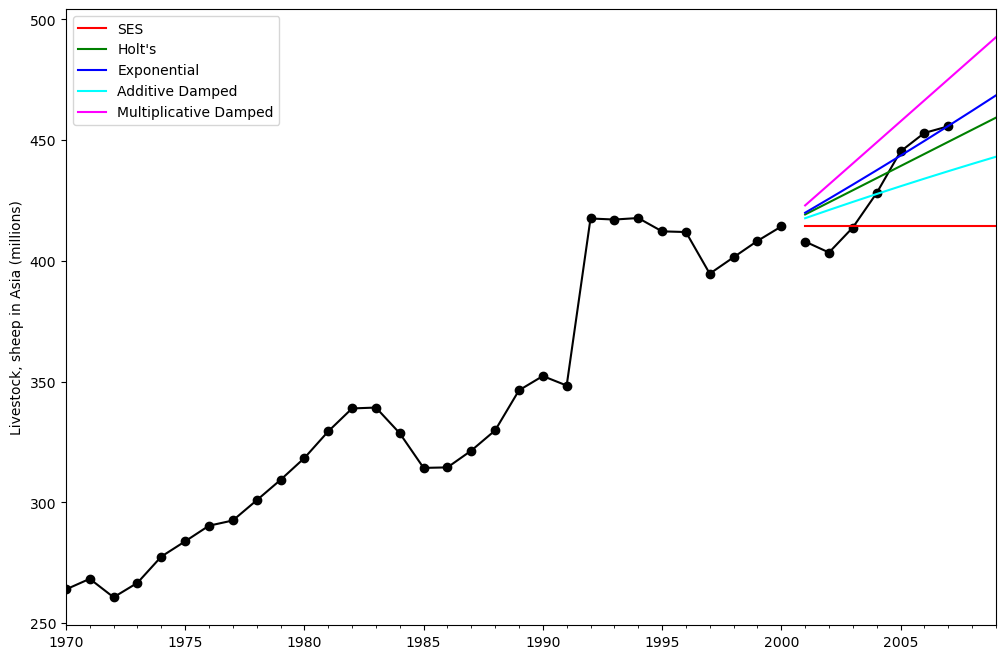

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [18]:
fit1 = SimpleExpSmoothing(livestock2, initialization_method="estimated").fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2, initialization_method="estimated").fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped_trend=True, initialization_method="estimated").fit(
    damping_trend=0.98
)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(
    livestock2, exponential=True, damped_trend=True, initialization_method="estimated"
).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12, 8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("Livestock, sheep in Asia (millions)")
plt.show()
print(
    "Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods."
)

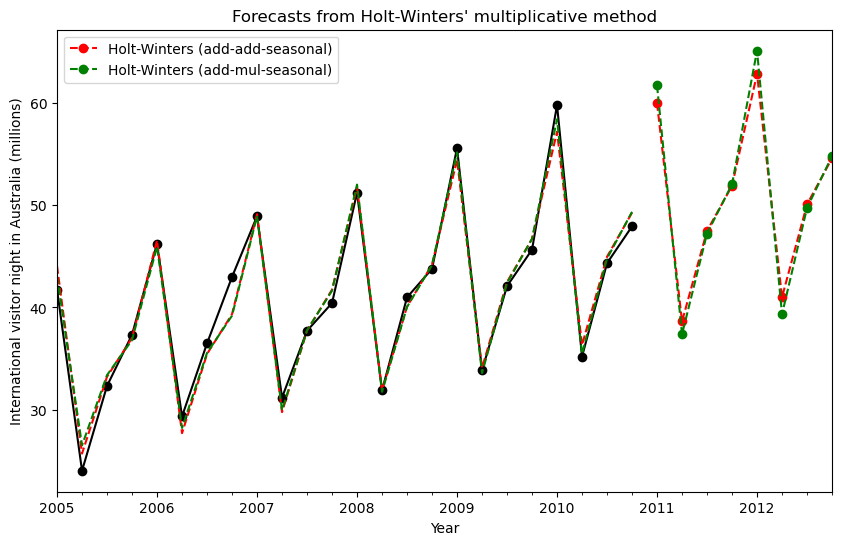

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


Additive  Multiplicative  Additive Dam  Multiplica Dam
$\alpha$  1.490116e-08    1.490116e-08  1.490116e-08    1.490116e-08
$\beta$   1.409867e-08    1.630211e-23  6.490799e-09    5.042391e-09
$\phi$             NaN             NaN  9.430416e-01    9.536044e-01
$\gamma$  3.888398e-16    1.170439e-15  0.000000e+00    0.000000e+00
$l_0$     1.119347e+01    1.106379e+01  1.084022e+01    9.899293e+00
$b_0$     1.205396e-01    1.198960e-01  2.456749e-01    1.975446e-01
SSE       4.402746e+01    3.611262e+01  3.527620e+01    3.062033e+01

In [19]:
fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

results

In [20]:
fit1 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()

In [25]:
df = pd.DataFrame(
    np.c_[aust, fit1.level, fit1.trend, fit1.season, fit1.fittedvalues],
    columns=[r"$y_t$", r"$l_t$", r"$b_t$", r"$s_t$", r"$\hat{y}_t$"],
    index=aust.index,
)
pd.concat((df, fit1.forecast(8).rename(r"$\hat{y}_t$").to_frame()), sort=True)

$\hat{y}_t$     $b_t$      $l_t$      $s_t$    $y_t$
2005-01-01    44.584128  0.597822  34.297581  10.286547  41.7275
2005-04-01    24.938189  0.597822  34.895403  -9.957214  24.0418
2005-07-01    33.005765  0.597822  35.493225  -2.487459  32.3281
2005-10-01    37.031107  0.597822  36.091047   0.940060  37.3287
2006-01-01    46.975416  0.597822  36.688869  10.286547  46.2132
2006-04-01    27.329477  0.597822  37.286691  -9.957214  29.3463
2006-07-01    35.397053  0.597822  37.884513  -2.487459  36.4829
2006-10-01    39.422395  0.597822  38.482335   0.940060  42.9777
2007-01-01    49.366704  0.597822  39.080157  10.286547  48.9015
2007-04-01    29.720765  0.597822  39.677979  -9.957214  31.1802
2007-07-01    37.788341  0.597822  40.275801  -2.487459  37.7179
2007-10-01    41.813683  0.597822  40.873623   0.940060  40.4202
2008-01-01    51.757992  0.597822  41.471445  10.286547  51.2069
2008-04-01    32.112053  0.597822  42.069267  -9.957214  31.8872
2008-07-01    40.179629  0.597822  42.667089  -2.487459  40.9783
2008-10-01    44.204971  0.597822  43.264910   0.940060  43.7725
2009-01-01    54.149279  0.597822  43.862732  10.286547  55.5586
2009-04-01    34.503341  0.597822  44.460554  -9.957214  33.8509
2009-07-01    42.570917  0.597822  45.058376  -2.487459  42.0764
2009-10-01    46.596259  0.597822  45.656198   0.940060  45.6423
2010-01-01    56.540567  0.597822  46.254020  10.286547  59.7668
2010-04-01    36.894629  0.597822  46.851842  -9.957214  35.1919
2010-07-01    44.962205  0.597822  47.449664  -2.487459  44.3197
2010-10-01    48.987546  0.597822  48.047486   0.940060  47.9137
2011-01-01    58.931855       NaN        NaN        NaN      NaN
2011-04-01    39.285916       NaN        NaN        NaN      NaN
2011-07-01    47.353493       NaN        NaN        NaN      NaN
2011-10-01    51.378834       NaN        NaN        NaN      NaN
2012-01-01    61.323143       NaN        NaN        NaN      NaN
2012-04-01    41.677204       NaN        NaN        NaN      NaN
2012-07-01    49.744781       NaN        NaN        NaN      NaN
2012-10-01    53.770122       NaN        NaN        NaN      NaN

In [28]:
df = pd.DataFrame(
    np.c_[aust, fit2.level, fit2.trend, fit2.season, fit2.fittedvalues],
    columns=[r"$y_t$", r"$l_t$", r"$b_t$", r"$s_t$", r"$\hat{y}_t$"],
    index=aust.index,
)
pd.concat((df,fit2.forecast(8).rename(r"$\hat{y}_t$").to_frame()), sort=True)

$\hat{y}_t$    $b_t$      $l_t$     $s_t$    $y_t$
2005-01-01    43.005360  0.62093  35.015791  1.228170  41.7275
2005-04-01    26.352945  0.62093  35.636721  0.739488  24.0418
2005-07-01    33.284725  0.62093  36.257651  0.918006  32.3281
2005-10-01    36.719519  0.62093  36.878582  0.995687  37.3287
2006-01-01    46.055792  0.62093  37.499512  1.228170  46.2132
2006-04-01    28.189627  0.62093  38.120442  0.739488  29.3463
2006-07-01    35.564794  0.62093  38.741372  0.918006  36.4829
2006-10-01    39.192527  0.62093  39.362302  0.995687  42.9777
2007-01-01    49.106225  0.62093  39.983233  1.228170  48.9015
2007-04-01    30.026310  0.62093  40.604163  0.739488  31.1802
2007-07-01    37.844863  0.62093  41.225093  0.918006  37.7179
2007-10-01    41.665535  0.62093  41.846023  0.995687  40.4202
2008-01-01    52.156657  0.62093  42.466953  1.228170  51.2069
2008-04-01    31.862993  0.62093  43.087883  0.739488  31.8872
2008-07-01    40.124933  0.62093  43.708814  0.918006  40.9783
2008-10-01    44.138543  0.62093  44.329744  0.995687  43.7725
2009-01-01    55.207090  0.62093  44.950674  1.228170  55.5586
2009-04-01    33.699676  0.62093  45.571604  0.739488  33.8509
2009-07-01    42.405002  0.62093  46.192534  0.918006  42.0764
2009-10-01    46.611551  0.62093  46.813464  0.995687  45.6423
2010-01-01    58.257522  0.62093  47.434395  1.228170  59.7668
2010-04-01    35.536359  0.62093  48.055325  0.739488  35.1919
2010-07-01    44.685071  0.62093  48.676255  0.918006  44.3197
2010-10-01    49.084559  0.62093  49.297185  0.995687  47.9137
2011-01-01    61.307954      NaN        NaN       NaN      NaN
2011-04-01    37.373042      NaN        NaN       NaN      NaN
2011-07-01    46.965141      NaN        NaN       NaN      NaN
2011-10-01    51.557567      NaN        NaN       NaN      NaN
2012-01-01    64.358387      NaN        NaN       NaN      NaN
2012-04-01    39.209724      NaN        NaN       NaN      NaN
2012-07-01    49.245210      NaN        NaN       NaN      NaN
2012-10-01    54.030575      NaN        NaN       NaN      NaN

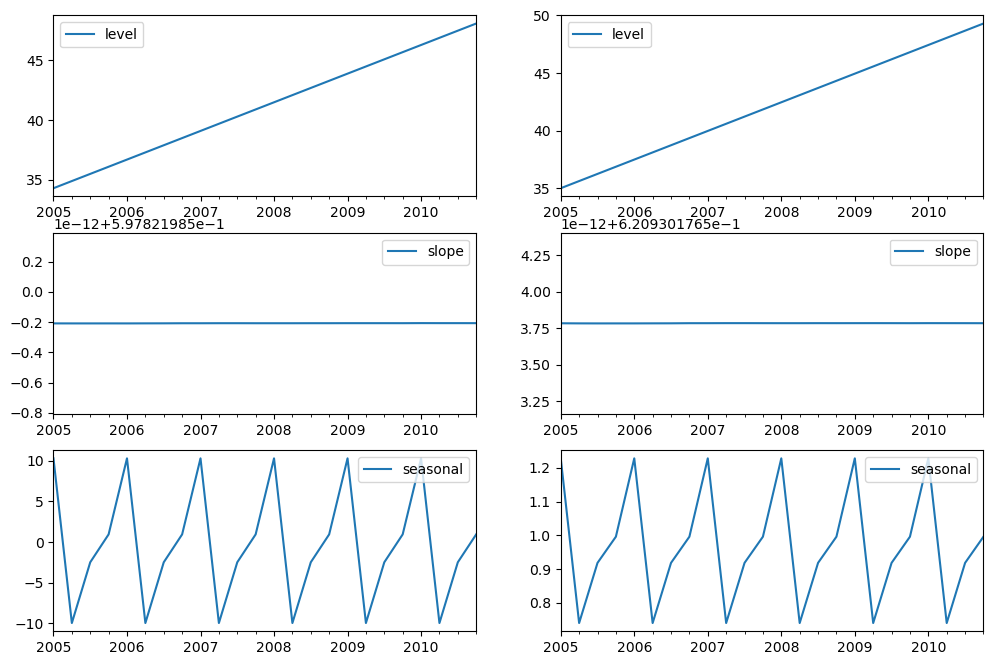

In [29]:
states1 = pd.DataFrame(
    np.c_[fit1.level, fit1.trend, fit1.season],
    columns=["level", "slope", "seasonal"],
    index=aust.index,
)
states2 = pd.DataFrame(
    np.c_[fit2.level, fit2.trend, fit2.season],
    columns=["level", "slope", "seasonal"],
    index=aust.index,
)
fig, [[ax1, ax4], [ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12, 8))
states1[["level"]].plot(ax=ax1)
states1[["slope"]].plot(ax=ax2)
states1[["seasonal"]].plot(ax=ax3)
states2[["level"]].plot(ax=ax4)
states2[["slope"]].plot(ax=ax5)
states2[["seasonal"]].plot(ax=ax6)
plt.show()

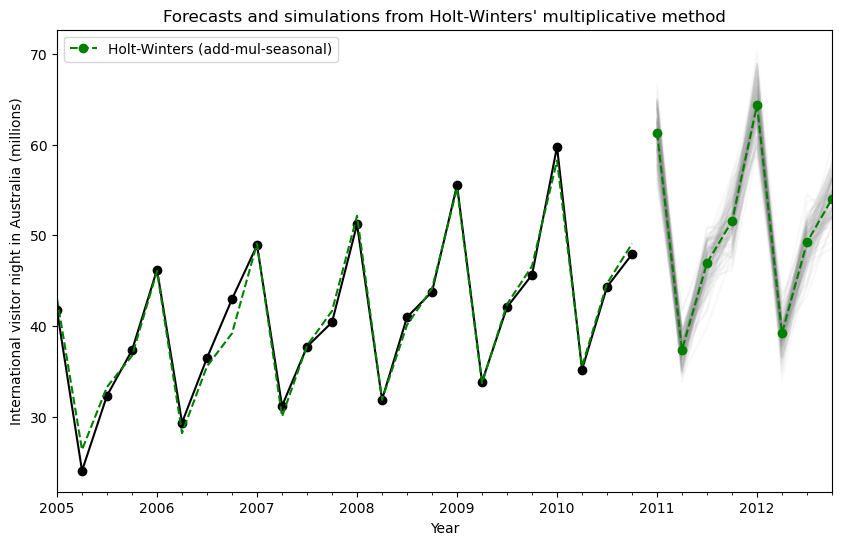

In [30]:
fit = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()
simulations = fit.simulate(8, repetitions=100, error="mul")

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts and simulations from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit.fittedvalues.plot(ax=ax, style="--", color="green")
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
fit.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
plt.show()

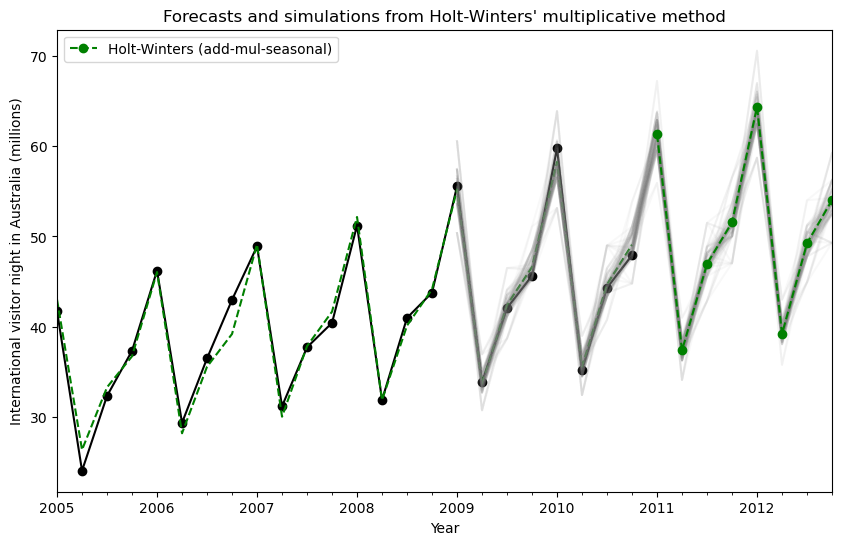

In [31]:
fit = ExponentialSmoothing(
    aust,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()
simulations = fit.simulate(
    16, anchor="2009-01-01", repetitions=100, error="mul", random_errors="bootstrap"
)

ax = aust.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts and simulations from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit.fittedvalues.plot(ax=ax, style="--", color="green")
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
fit.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
plt.show()